<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Sesi%C3%B3n_7_Series_de_Tiempo_Pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sesión 7: Series de Tiempo Práctica**



<img src="https://www.grupolambda.com.pe/wp-content/uploads/2020/03/home-logo.png" alt="drawing" width="300"/>
<br>

 ##### Docente: Jorge Brian Alarcon Flores 

In [ ]:
# Importing necessary modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import statsmodels.api as sm
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Importamos la data
url = 'https://raw.githubusercontent.com/JBrianAlicorp/Business-Analytics/master/supermercado_time.csv'
dataset = pd.read_csv(url,encoding='latin1')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
dataset.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [ ]:
set(dataset['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

## Preprocesamiento de data

Primero analizaremos la serie temporal de ventas de muebles, seguida de otras categorías.

In [ ]:
furniture = dataset.loc[dataset['Category'] == 'Furniture']

# Esto muestra que tenemos datos de series temporales de 4 años para la venta de muebles.
print(furniture['Order Date'].min())
furniture['Order Date'].max()

01/01/2017


'31/12/2015'

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# furniture data
furniture.sort_values('Order Date')
furniture.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

## Indexación de datos de series temporales

In [ ]:
furniture = furniture.set_index('Order Date')
furniture.index

Index(['01/01/2017', '01/03/2014', '01/03/2015', '01/03/2016', '01/04/2016',
       '01/04/2017', '01/05/2015', '01/05/2016', '01/05/2017', '01/06/2014',
       ...
       '31/07/2015', '31/07/2016', '31/07/2017', '31/08/2015', '31/08/2017',
       '31/10/2014', '31/10/2015', '31/10/2016', '31/12/2014', '31/12/2015'],
      dtype='object', name='Order Date', length=889)

Puede ser difícil trabajar con nuestros datos de fecha y hora actuales, por lo tanto, utilizaremos los valores de ventas diarias promedios para ese mes, y usaremos el inicio de cada mes como la marca de tiempo.

In [ ]:
furniture.index = pd.to_datetime(furniture.index)

In [ ]:
# Averaging Daily Sales
y = furniture['Sales'].resample('MS').mean()

In [ ]:
y['2017':]

Order Date
2017-01-01     925.827053
2017-02-01    1049.935400
2017-03-01     621.655512
2017-04-01     557.245886
2017-05-01     539.623495
2017-06-01     771.083705
2017-07-01     638.451841
2017-08-01     965.216000
2017-09-01     996.806227
2017-10-01     753.598800
2017-11-01    1242.404375
2017-12-01     973.765627
Freq: MS, Name: Sales, dtype: float64

## Visualización de series temporales de datos de muebles

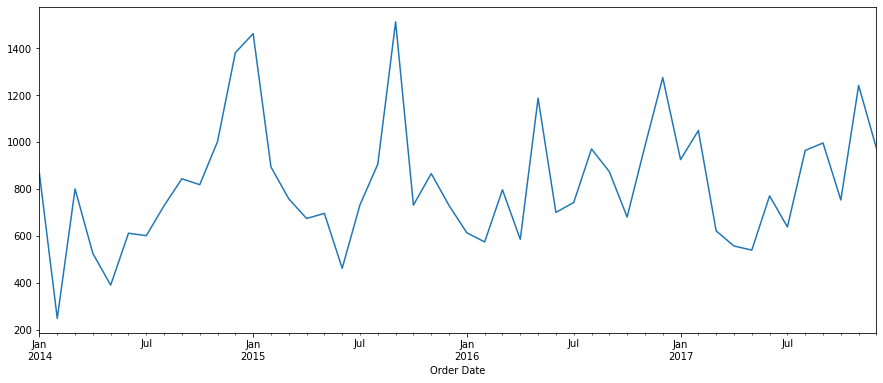

In [ ]:
y.plot(figsize=(15, 6))

Algunos patrones distinguibles aparecen cuando graficamos los datos. La serie temporal tiene un patrón de estacionalidad, como que las ventas siempre son bajas al comienzo del año y altas al final del año. Siempre hay una tendencia al alza en cualquier año con un par de meses bajos a mediados de año.


También podemos visualizar nuestros datos utilizando un método llamado descomposición de series temporales que nos permite descomponer nuestras series temporales en tres componentes distintos: tendencia, estacionalidad y ruido.

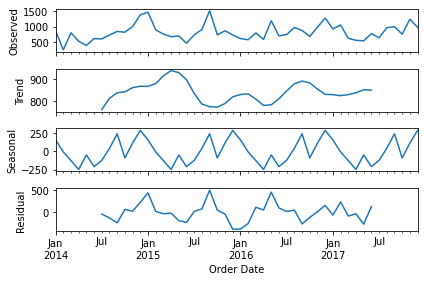

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

La gráfica anterior muestra que las ventas de muebles son altamente inestables, con estacionalidad y tendencia fácilmente observables.

## Modelo ARIMA

Los modelos ARIMA se donan con la notación: ARIMA (p, d, q) donde:
* p denota estacionalidad
* d denota tendencia
* q denota ruido en los datos

La configuración de un SARIMA requiere la selección de hiperparámetros tanto para la tendencia como para los componentes estacionales de la serie.

Componentes de tendencia:
* p denota el orden de tendencia de autorregresión
* d denota el orden de diferencia de tendencia
* q denota la tendencia del orden de promedio móvil

Componentes de estacionalidad:
* p denota orden autorregresivo estacional.
* d denota el orden de diferencia estacional.
* q denota el orden de la media móvil estacional.
* m indica el número de pasos de tiempo para un solo período estacional.
Abrir en Google Traductor

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


Ahora que hemos generado todos los parámetros posibles para nuestro modelo SARIMA, descubriremos el mejor parámetro para entrenar el modelo en él finalmente. :)

SARIMA significa el modelo ** Promedio móvil integrado estacional autorregresivo estacional **, que es una extensión del modelo ARIMA utilizado también para modelar el componente de estacionalidad. Por lo tanto, no necesitamos hacer series temporales estacionarias (no estacionales) antes de pronosticar.

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:770.4206789110617
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1404.8682496673487
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:511.76275523355844
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:529.4228051599147


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1180.0912695596157
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:334.77746753634335
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:719.280893469403
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2899.7901007749
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:494.3416759022519
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:526.9575997129239
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:30642.388141335865
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:336.68129955860786
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:656.2729114486209


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:757.4481410125828
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:507.59208021081105
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:504.0248882247784


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1231.765101812888
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:337.5123296425246
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:633.1758243525344
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:nan
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:488.2583922269306
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:499.63768625397967
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2684.0164203065806
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:326.00364073241354
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:674.302117200835
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1387.834805801644


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:508.8977361023478
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:503.0023438208996


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1258.4586975262064
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:319.21723656675147
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:651.6105955469718


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:nan
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:495.52907177435753
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:498.20051542708285
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:53699.33458094064
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:317.8795986228095
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:649.0348542584263
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1440.9747196290268


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:504.6103737002026
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:483.4135670522927


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1520.64308688083
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:315.11903186862645
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:630.847390453334
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2793.0195999952703
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:489.1931629301315
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:478.5173914008679
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:2787.6200420410923
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:312.5315050739605


Obtuvimos el valor AIC más bajo: 297.788 para ARIMA (1, 1, 1) x (1, 1, 0, 12). Utilizaremos estos mejores parámetros en nuestro modelo.

Aquí, el **criterio de información de Akaike (AIC)** es un estimador de la calidad relativa de los modelos estadísticos para un conjunto dado de datos. Dada una colección de modelos para los datos, AIC estima la calidad de cada modelo, en relación con cada uno de los otros modelos. Por lo tanto, AIC proporciona un medio para la selección del modelo.

AIC estima la cantidad relativa de información perdida por un modelo dado: cuanto menos información pierde un modelo (menos valor de AIC), mayor es la calidad de ese modelo.

In [ ]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0028      0.363      0.008      0.994      -0.709       0.715
ma.L1         -1.0000      0.233     -4.292      0.000      -1.457      -0.543
ar.S.L12      -0.6317      0.136     -4.658      0.000      -0.897      -0.366
sigma2      5.471e+04   4.26e-06   1.28e+10      0.000    5.47e+04    5.47e+04


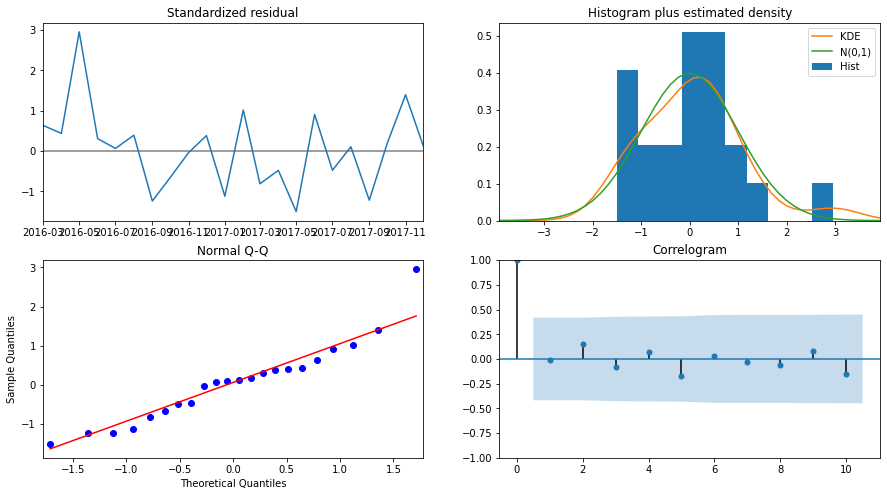

In [ ]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

Las gráficas anteriores sugieren que los residuos del modelo están distribuidos casi normalmente.

## Validación del modelo predictivo

Para validar los resultados del modelo, comparamos las ventas reales con las ventas predichas de los datos de series temporales que comienzan
desde 01/01/2017 hasta el final de los datos.

            lower Sales  upper Sales
Order Date                          
2017-01-01   721.779893  1675.409850
2017-02-01   327.738580  1278.635301
2017-03-01   343.848979  1292.390662
2017-04-01   199.816875  1146.308283
2017-05-01   429.368586  1374.058907
2017-06-01    81.070909  1024.166496
2017-07-01   282.131472  1223.805129
2017-08-01   469.457252  1409.855137
2017-09-01   819.350981  1758.597816
2017-10-01   240.077385  1178.280450
2017-11-01   439.967581  1377.219826
2017-12-01   477.225749  1413.608235


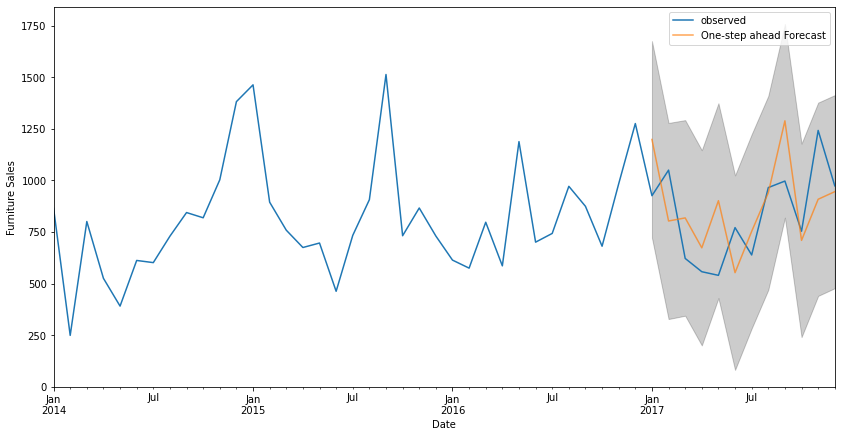

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

El gráfico anterior demuestra que los valores pronosticados se alinean bien con los valores verdaderos que capturan una estacionalidad ascendente. Ahora, calculamos el error cuadrático medio de nuestros valores pronosticados con los valores originales.

In [ ]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 48289.2519


In [ ]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 219.7481555685778


## Pronósticos futuros

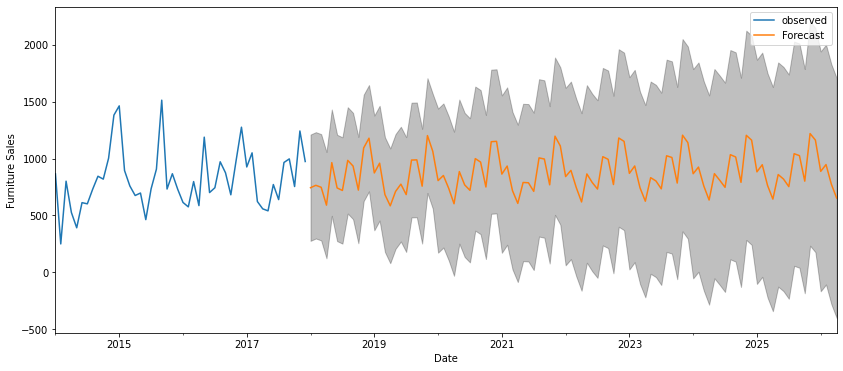

In [ ]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Aquí, tenga en cuenta que el intervalo de confianza aumenta a medida que avanzamos hacia el futuro. El modelo se vuelve menos seguro al predecir los valores a medida que avanzamos.


Nuestros datos tienen 3 categorías: 'Muebles', 'Suministros de oficina' y 'Tecnología'. Comparemos las series temporales 'Muebles' y 'Suministros de oficina'.


## Muebles vs Suministros de oficina

In [ ]:
furniture = dataset.loc[dataset['Category'] == 'Furniture']
office = dataset.loc[dataset['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
furniture.head()

,Sales
Order Date,
01/01/2017,975.4900
01/03/2014,1893.9950
01/03/2015,1412.7504
01/03/2016,836.5920
01/04/2016,1324.5320


In [ ]:
furniture.index = pd.to_datetime(furniture.index)


In [ ]:
office.index = pd.to_datetime(office.index)

In [ ]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

Ahora, combinemos ambas series de tiempo para compararlas.


In [ ]:
store = furniture.merge(office, on='Order Date', how='inner')
store.rename(columns={'Sales_x': 'Furniture Sales', 'Sales_y': 'Office Sales'}, inplace=True)
store.head()

,Order Date,Furniture Sales,Office Sales
0,2014-01-01,864.733571,444.576632
1,2014-02-01,248.475714,218.499545
2,2014-03-01,800.669889,296.721840
3,2014-04-01,525.167692,352.387750
4,2014-05-01,390.457467,703.816174


## Visualizando series de tiempo de Muebles vs Ventas de oficina

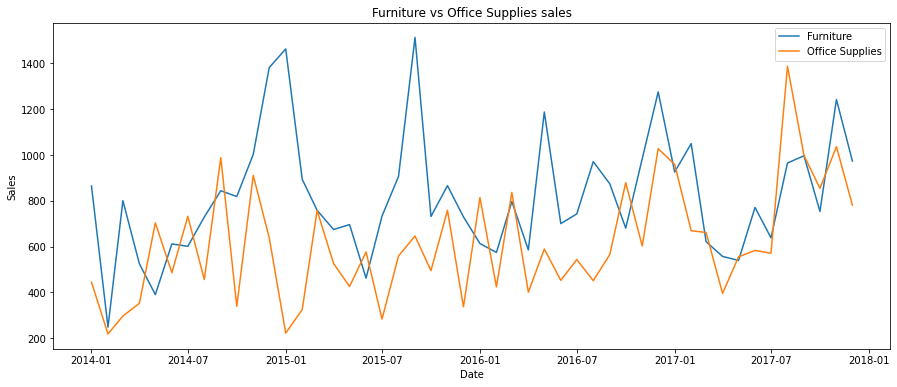

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(store['Order Date'], store['Furniture Sales'], label='Furniture')
plt.plot(store['Order Date'], store['Office Sales'], label='Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales')
plt.legend()

### Pocas observaciones:

* La gráfica anterior muestra claramente que tanto los muebles como los suministros de oficina exhiben un componente de estacionalidad similar.
* Las ventas son generalmente bajas al comienzo de cada año, como lo demuestra la disminución de la pendiente de la línea al comienzo del año 2014, 2015, 2016, etc.
* Además, las ventas promedio mensuales de muebles son más altas que las de suministros de oficina. Probablemente se deba a que el costo de los muebles es mucho mayor en comparación con los servicios públicos de oficina.

Pero hay pocos casos en la serie de tiempo donde las ventas de suministros de oficina superan a los muebles. Es principalmente en **julio de 2014** por primera vez en el conjunto de datos.